First 5 records:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Mean Squared Error: 5592763202.743439
Root Mean Squared Er

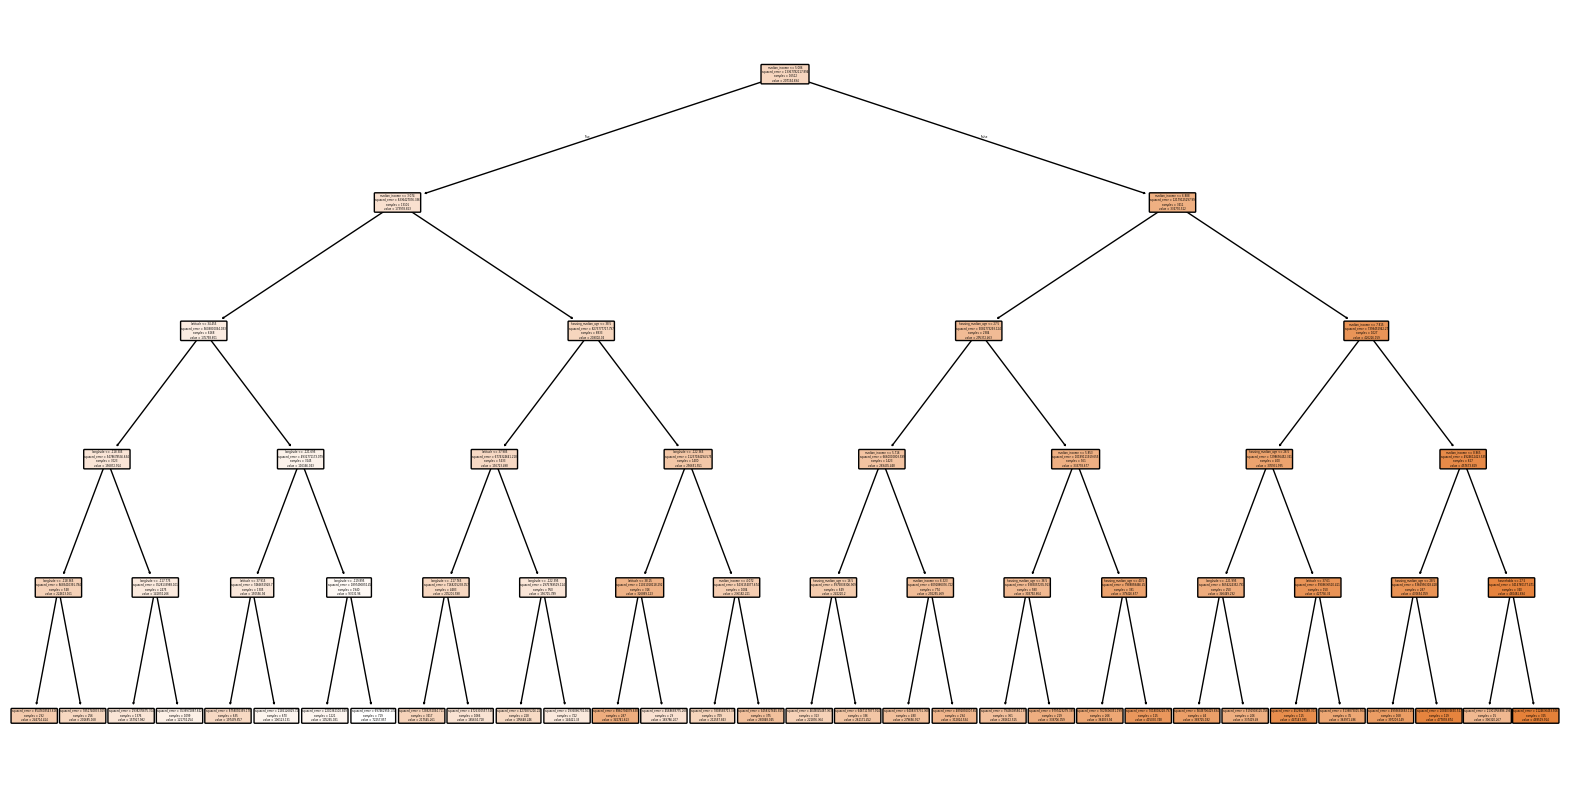

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import kagglehub
path = kagglehub.dataset_download("camnugent/california-housing-prices")
df = pd.read_csv(path + '/housing.csv')

print("First 5 records:", df.head())
# Feature Engineering (Beispiel: Auswahl relevanter Features)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value'

# Fehlende Werte behandeln (Beispiel: Füllen mit dem Mittelwert)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# Daten aufteilen
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regression Tree erstellen und trainieren
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Vorhersagen
y_pred = regressor.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
import numpy as np
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
summary = df['median_house_value'].describe()
print(summary)

# Plot des Baumes (optional)
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=features, filled=True, rounded=True)
plt.show()